<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> Drug Consumptions </b></p>
</div>

# **group number: 37**
 
## Analyzed By: yehonatan Simcha and Itamar Rot

### link to data: [https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci](https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci)
![Example Image](https://github.com/yehonatansimcha/project2/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%202.png?raw=true)

## Table of Contents
1. [Data Exploration](#data-exploration)
2. [Education Level vs. Drug Use](#education-level-vs-drug-use)
3. [Hard Drug Use](#hard-drug-use)
4. [Psychedelic Drugs](#psychedelic-drugs)
5. [Cannabis](#cannabis)

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import ttest_ind
url = 'https://raw.githubusercontent.com/yehonatansimcha/project2/main/Drug_Consumption.csv'
mrkt_df = pd.read_csv(url)

<a name="data-exploration"></a>
## Data Exploration

In [2]:
mrkt_df.shape

(1884, 32)

In [3]:
mrkt_df.head(1)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0


Converting age range to numerical values by creating columns for the younger age and the older age in the range

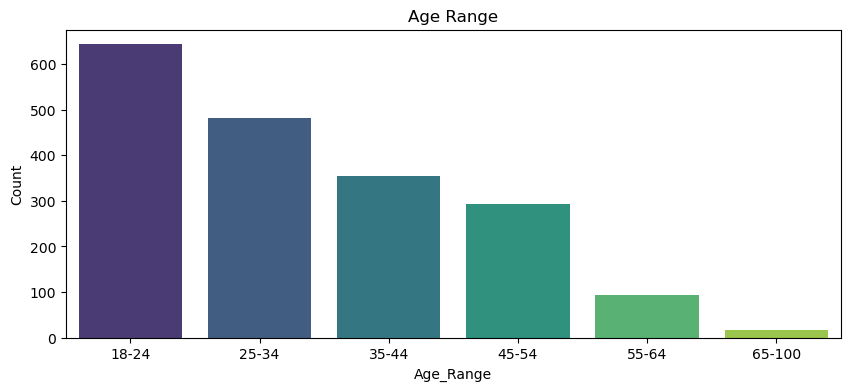

In [4]:
def extract_age_range(age):
    if age == "65+":
        return (65, 100)  #65+ = "65-100"
    else:
        lower, upper = age.split('-')
        return (int(lower), int(upper))
mrkt_df[['Age_Lower', 'Age_Upper']] = mrkt_df['Age'].apply(extract_age_range).apply(pd.Series)
mrkt_df['Age_Range'] = mrkt_df['Age_Lower'].astype(str) + '-' + mrkt_df['Age_Upper'].astype(str)
age_distribution = mrkt_df['Age_Range'].value_counts().sort_index().reset_index()
age_distribution.columns = ['Age_Range', 'Count']
plt.figure(figsize=(10, 4))
sns.barplot(data=age_distribution, x='Age_Range', y='Count', palette='viridis')
plt.title('Age Range')
plt.show()

Replacing last usage data with numerical values as follows:
- 0 - Never Used
- 1 - Used over a Decade Ago
- 2 - Used in Last Decade
- 3 - Used in Last Year 
- 4 - Used in Last Month
- 5 - Used in Last Week
- 6 - Used in Last Day

In [5]:
mapping = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}
mrkt_df[['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
           'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
           'Mushrooms', 'Nicotine', 'Semer', 'VSA']] = mrkt_df[['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc',
                                                                  'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
                                                                  'Mushrooms', 'Nicotine', 'Semer', 'VSA']].replace(mapping).convert_dtypes()
mrkt_df.head(2)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Age_Lower,Age_Upper,Age_Range
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,2,3,0,4,0,0,25,34,25-34
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,1,0,0,0,35,44,35-44


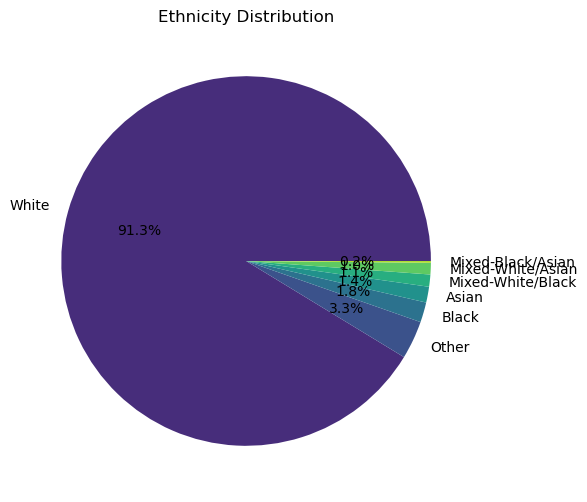

In [6]:
ethnicity_distribution = mrkt_df['Ethnicity'].value_counts()
plt.figure(figsize=(8, 6))
ethnicity_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('viridis', len(ethnicity_distribution)))
plt.title('Ethnicity Distribution')
plt.ylabel('') 
plt.show()

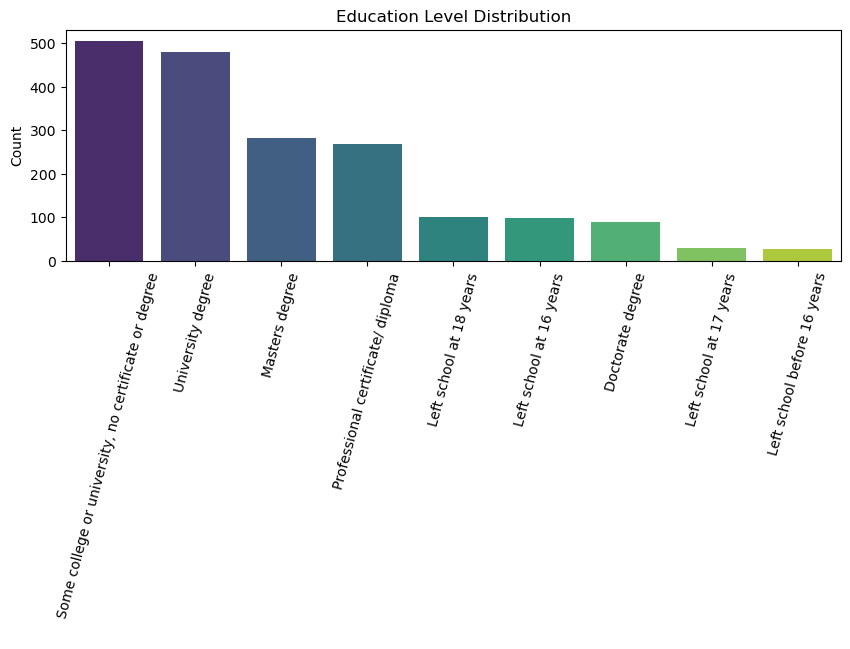

In [7]:
education_distribution = mrkt_df['Education'].value_counts().reset_index()
education_distribution.columns = ['Education', 'Count']
plt.figure(figsize=(10, 3))
sns.barplot(data=education_distribution, x='Education', y='Count', palette='viridis')
plt.title('Education Level Distribution')
plt.xlabel(' ')
plt.xticks(rotation=75)
plt.show()

<a name="education-level-vs-drug-use"></a>
## Education Level vs. Drug Use
Initially, we considered the relationship between education level and drug use (hard or moderate drugs). We hypothesized that there would be higher usage rates among people with lower education levels.

We created two groups of drugs: those considered hard drugs and those considered less hard drugs. We are interested in examining their use over the last year, the last month, the last week, and the last day, meaning people who used them in the relatively recent period.

![Example Image](https://github.com/yehonatansimcha/project2/blob/main/%D7%AA%D7%9E%D7%95%D7%A0%D7%94%203.png?raw=true)

In [8]:
df_ed = mrkt_df.copy()
education_counts = df_ed['Education'].value_counts()
print(education_counts)

Education
Some college or university, no certificate or degree    506
University degree                                       480
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                 100
Left school at 16 years                                  99
Doctorate degree                                         89
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64


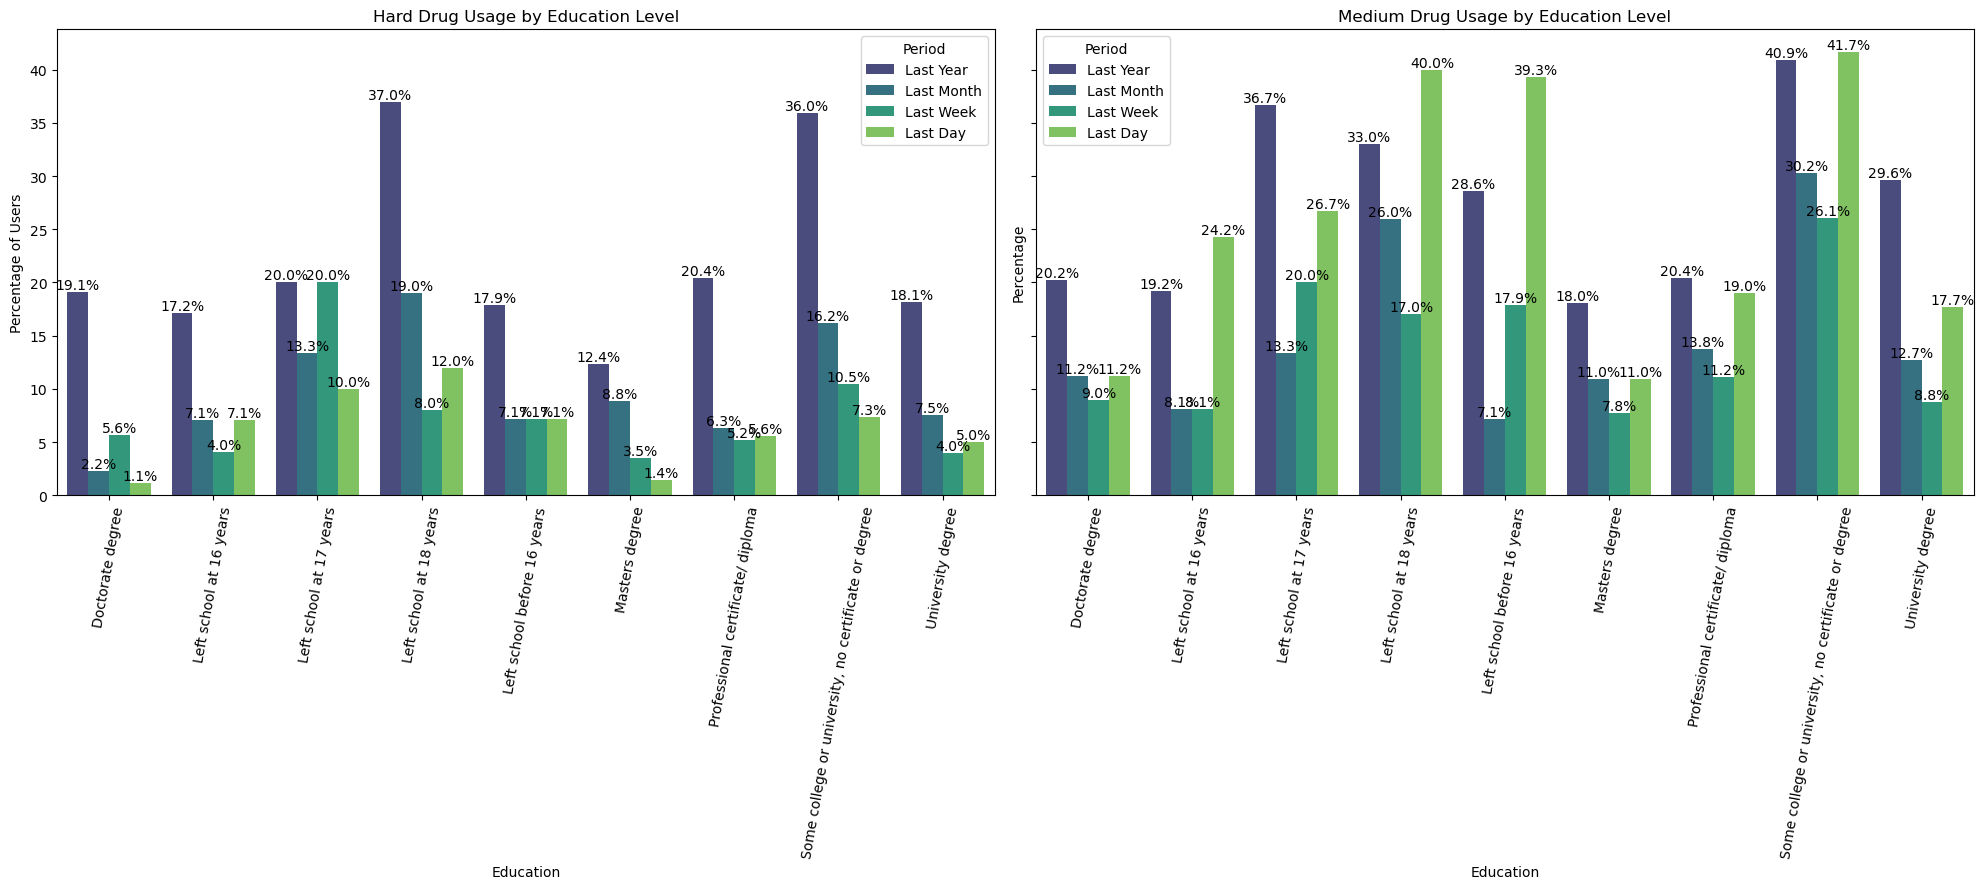

In [9]:
medium_drugs = ['Cannabis', 'Ecstasy', 'LSD']
hard_drugs = ['Coke', 'Crack', 'Heroin', 'Ketamine', 'Meth']
def calculate_usage_percentage(df, drugs, period):
    return (df[drugs] == period).sum(axis=1).gt(0).groupby(df['Education']).mean() * 100
usage_last_year_hard = calculate_usage_percentage(df_ed, hard_drugs, 3)
usage_last_month_hard = calculate_usage_percentage(df_ed, hard_drugs, 4)
usage_last_week_hard = calculate_usage_percentage(df_ed, hard_drugs, 5)
usage_last_day_hard = calculate_usage_percentage(df_ed, hard_drugs, 6)
usage_last_year_medium = calculate_usage_percentage(df_ed, medium_drugs, 3)
usage_last_month_medium = calculate_usage_percentage(df_ed, medium_drugs, 4)
usage_last_week_medium = calculate_usage_percentage(df_ed, medium_drugs, 5)
usage_last_day_medium = calculate_usage_percentage(df_ed, medium_drugs, 6)
hard_usage_df = pd.DataFrame({'Education': usage_last_year_hard.index, 'Last Year': usage_last_year_hard.values, 'Last Month': usage_last_month_hard.values, 'Last Week': usage_last_week_hard.values, 'Last Day': usage_last_day_hard.values})
medium_usage_df = pd.DataFrame({'Education': usage_last_year_medium.index, 'Last Year': usage_last_year_medium.values, 'Last Month': usage_last_month_medium.values, 'Last Week': usage_last_week_medium.values, 'Last Day': usage_last_day_medium.values})
hard_usage_df_melted = hard_usage_df.melt(id_vars='Education', var_name='Period', value_name='Percentage')
medium_usage_df_melted = medium_usage_df.melt(id_vars='Education', var_name='Period', value_name='Percentage')
fig, axes = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
sns.barplot(data=hard_usage_df_melted, x='Education', y='Percentage', hue='Period', palette='viridis', ax=axes[0])
axes[0].set_title('Hard Drug Usage by Education Level')
axes[0].set_ylabel('Percentage of Users')
axes[0].legend(title='Period')
axes[0].tick_params(axis='x', rotation=80)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom')
sns.barplot(data=medium_usage_df_melted, x='Education', y='Percentage', hue='Period', palette='viridis', ax=axes[1])
axes[1].set_title('Medium Drug Usage by Education Level')
axes[1].legend(title='Period')
axes[1].tick_params(axis='x', rotation=80)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom')
plt.tight_layout()
plt.show()

Regarding the use of hard drugs, we can see that our hypothesis is relatively correct. There are lower percentages in each recent usage column for those with a professional certificate or academic degree compared to people without any certification, who have higher usage percentages.

Regarding the use of moderate drugs, we can also see that our hypothesis is relatively correct, although the differences were less drastic than in the hard drugs graph. In fact, there are even some columns where the usage rates among those with a professional certificate or academic degree are higher than among some of the lower education levels.

An interesting observation is that there are relatively sharp differences among those with lower education levels. Therefore, we will now examine them more closely to gain a better understanding.

In [10]:
education_levels = ['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years', 'Left school at 18 years', 'Some college or university, no certificate or degree']
df_ed_filtered = df_ed[df_ed['Education'].isin(education_levels)]
education_counts = df_ed_filtered['Education'].value_counts()
print(education_counts)

Education
Some college or university, no certificate or degree    506
Left school at 18 years                                 100
Left school at 16 years                                  99
Left school at 17 years                                  30
Left school before 16 years                              28
Name: count, dtype: int64


We can see that there are around 30 people who stated that they left school at age 17, and 28 people who stated that they left school before age 16. In the other education levels of people without any professional or academic certification, there are more than 100. Therefore, we will analyze the results accordingly, and it is important to note this.

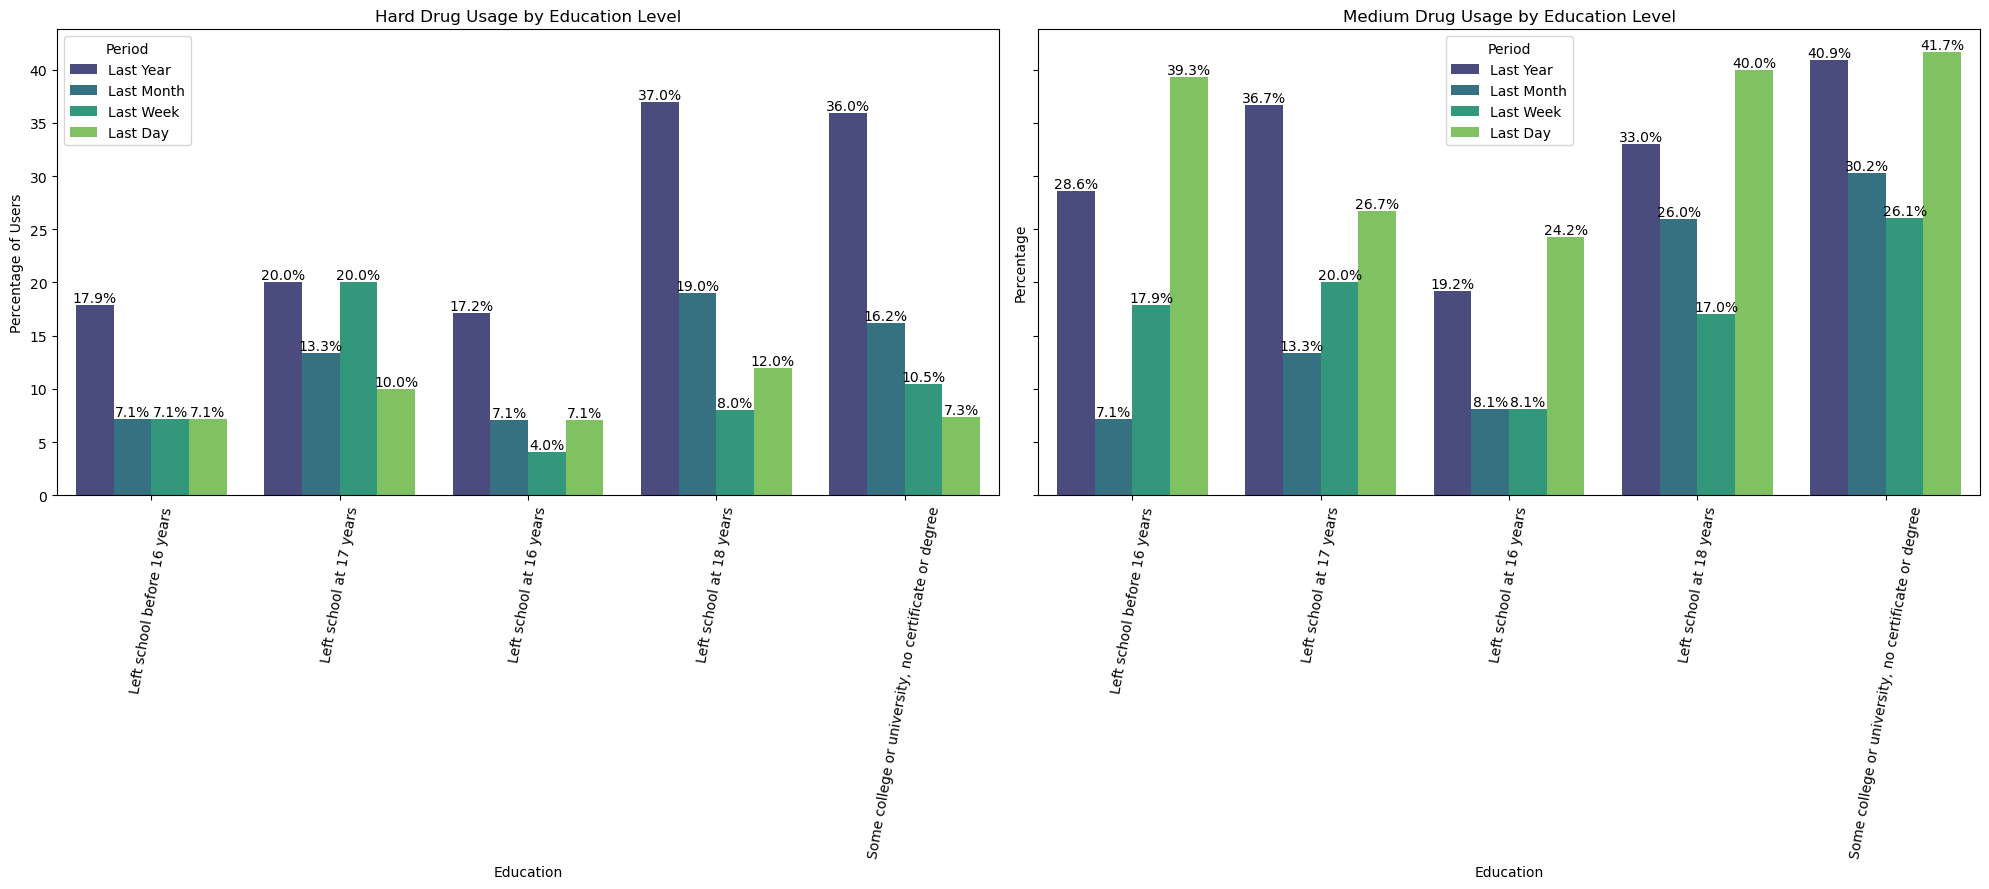

In [11]:
order = ['Left school before 16 years', 'Left school at 17 years', 'Left school at 16 years', 'Left school at 18 years', 'Some college or university, no certificate or degree']
fig, axes = plt.subplots(1, 2, figsize=(20, 9), sharey=True)
sns.barplot(data=hard_usage_df_melted, x='Education', y='Percentage', hue='Period', palette='viridis', ax=axes[0], order=order)
axes[0].set_title('Hard Drug Usage by Education Level')
axes[0].set_ylabel('Percentage of Users')
axes[0].legend(title='Period')
axes[0].tick_params(axis='x', rotation=80)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom')
sns.barplot(data=medium_usage_df_melted, x='Education', y='Percentage', hue='Period', palette='viridis', ax=axes[1], order=order)
axes[1].set_title('Medium Drug Usage by Education Level')
axes[1].legend(title='Period')
axes[1].tick_params(axis='x', rotation=80)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.1f}%', 
                     (p.get_x() + p.get_width() / 2., height), 
                     ha='center', va='bottom')
plt.tight_layout()
plt.show()

We will analyze each graph in the following manner: we will analyze those who left school at age 17 compared to those who left school before age 16, and separately analyze those who left university or left school at age 18 compared to those who left school at age 16. This is due to the difference in the number of survey respondents from each education level. In the hard drugs graph, we can see that people who left the educational framework later use drugs more than those who left earlier. In the moderate drugs graph, it is difficult to see significant differences between those who left school before age 16 and those who left at age 17, likely due to the smaller, less representative sample size. However, in the second comparison, we can see relatively significant differences in each frequency column, as we discovered in the hard drugs graph.

### Conclusion:
We can see a correlation between education level and drug use. Generally, as education level increases, drug use percentages decrease. However, this is different for those without any academic or professional certification. The expectation is that the higher the education level, the lower the drug use. Yet, among those without a higher education certificate, the opposite is true. The recent graphs (especially the hard drugs graph) show that those who left college or university, and those who left school at ages 18 or 17, have higher usage rates than those who left school at age 16 or earlier.

<a name="hard-drug-use"></a>
## Hard Drug Use
We are interested in discovering more about hard drug use.

First, we will ask a question that interests us regarding people who have not used hard drugs for over a decade or more than a year and check if they are currently addicted to cigarettes.

Then, we will examine who the people currently using hard drugs are and try to understand more about them.

In [12]:
clean = mrkt_df.loc[(mrkt_df['Ketamine'] == 2)  | (mrkt_df['Meth'] == 2) | (mrkt_df['Heroin'] == 2) |(mrkt_df['Ketamine'] == 1)  | (mrkt_df['Meth'] == 1) | (mrkt_df['Heroin'] == 1),:]
clean.shape

(361, 35)

In [13]:
clean_smokers = clean.loc[(clean['Nicotine'] == 6) ,:]
clean_smokers.shape

(165, 35)

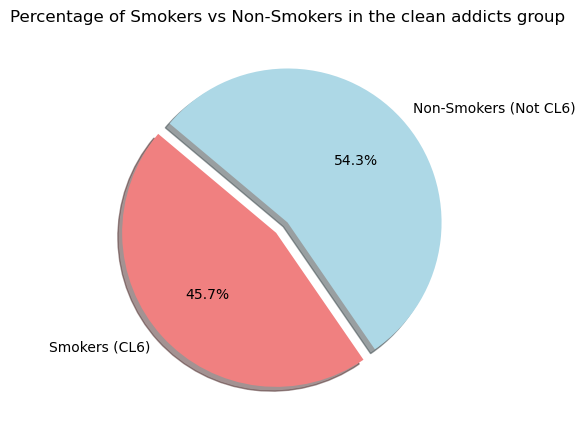

In [14]:
smokers = clean.loc[clean['Nicotine'] == 6].shape[0]
non_smokers = clean.shape[0] - smokers
total = clean.shape[0]
percentage_smokers = (smokers / total) * 100
percentage_non_smokers = (non_smokers / total) * 100
plt.figure(figsize=(8, 5))
plt.pie([percentage_smokers, percentage_non_smokers], explode=(0.1, 0), labels=['Smokers (CL6)', 'Non-Smokers (Not CL6)'], colors=['lightcoral', 'lightblue'], autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Smokers vs Non-Smokers in the clean addicts group')
plt.show()

We hypothesized that the group of people who used hard drugs in the past, meaning their last use was within the last decade or more than a decade ago (likely having been addicted due to the highly addictive nature of these drugs), would mostly smoke cigarettes today, meaning they would report using nicotine on the last day. However, we were surprised to find that just under half of the group we examined reported using nicotine on the last day. Now we will examine whether the group we studied differs from the general population in terms of nicotine consumption.

               Country  Percentage
0                  USA   48.484848
1                   UK   35.757576
2                Other    9.090909
3            Australia    2.424242
4               Canada    2.424242
5  Republic of Ireland    1.212121
6          New Zealand    0.606061


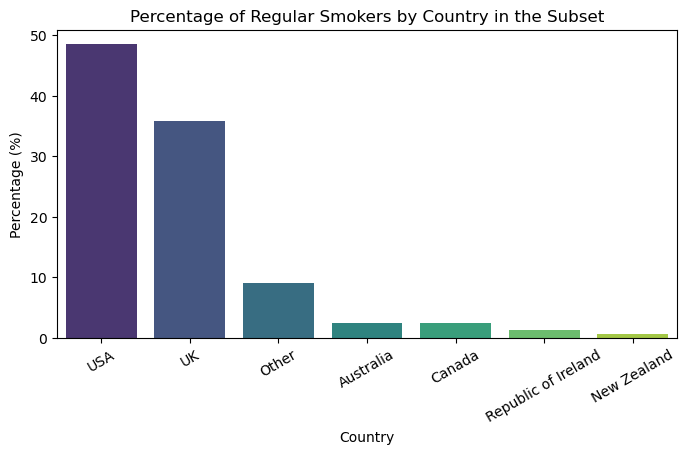

In [15]:
country_counts = clean_smokers['Country'].value_counts(normalize=True) * 100
country_percentage_df = country_counts.reset_index()
country_percentage_df.columns = ['Country', 'Percentage']
print(country_percentage_df)
plt.figure(figsize=(8, 4))
sns.barplot(data=country_percentage_df, x='Country', y='Percentage', palette='viridis')
plt.title('Percentage of Regular Smokers by Country in the Subset')
plt.ylabel('Percentage (%)')
plt.tick_params(axis='x', rotation=30)
plt.show()

We took data about the smoking rates of the population from each of the countries of the group members being examined. We averaged the data from the years 2015-2021, as these are the years when the survey was likely answered, and now we will calculate a weighted average based on our data.

In [16]:
smoking_rates = {'UK': 15.56, 'USA': 14.06, 'Australia': 13.67, 'Canada': 14.99, 'Republic of Ireland': 17.33, 'New Zealand': 13.94, 'Other': 18.91}
country_counts = clean_smokers['Country'].value_counts()
total_smokers = country_counts.sum()
weighted_sum = sum((country_counts[country] / total_smokers) * smoking_rates[country] for country in country_counts.index)
print(f'The weighted average smoking rate is: {weighted_sum:.2f}%')

The weighted average smoking rate is: 15.09%


We can see that, although we hypothesized that most would report using nicotine on the last day, we found that just under half reported using nicotine on the last day. However, it is still evident that the group we examined is significantly different from the general population (from the countries they come from), where the smoking rates are much lower than the smoking rates of the group we examined.

Now we will examine the correlation between the personality traits we have in the data and the use of different drugs.

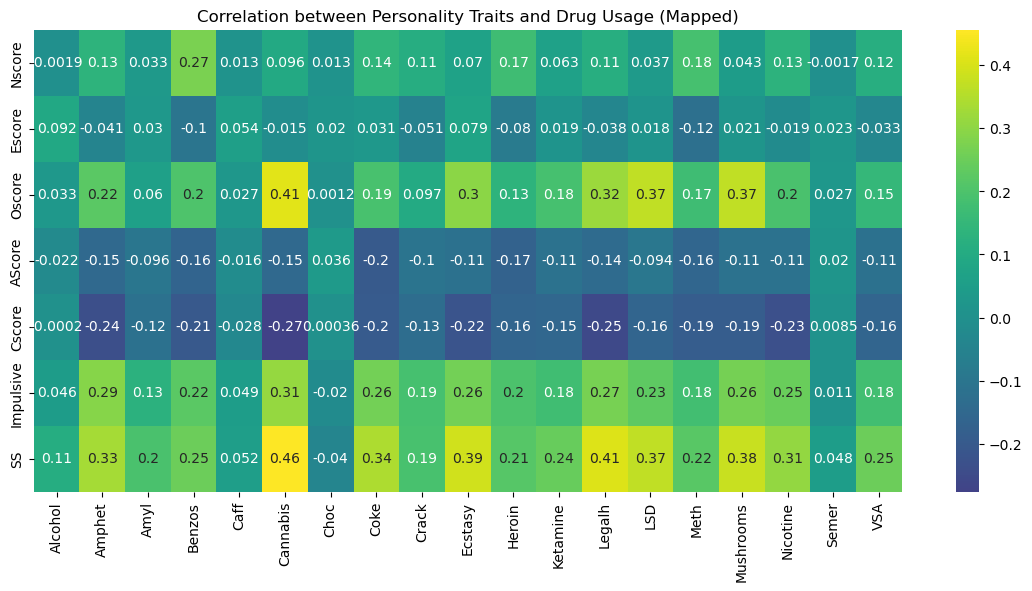

In [17]:
oreder_df = mrkt_df.copy()
drug_columns = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
personality_columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
correlation_matrix = oreder_df[personality_columns + drug_columns].corr()
correlation_personality_drugs = correlation_matrix.loc[personality_columns, drug_columns]
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_personality_drugs, annot=True, cmap='viridis', center=0)
plt.title('Correlation between Personality Traits and Drug Usage (Mapped)')
plt.show()

We can see that there is no particularly strong correlation, likely due to data normalization, which we understand is common in psychological tests. Therefore, we give less weight to this analysis and will address this table later.

Now we will examine the correlation between the use (last use in the past year, month, week, or day) of the three types of drugs identified as the most addictive and dangerous from our list and the personality traits of the users.

A brief explanation of the five personality traits:

Neuroticism (Nscore): Measures emotional stability. High scores indicate anxiety, depression, and emotional instability.

Extraversion (Escore): Measures sociability and assertiveness. High scores indicate outgoing, energetic, and talkative behavior.

Openness to Experience (Oscore): Measures creativity and openness to new experiences. High scores indicate imaginative and curious behavior.

Agreeableness (Ascore): Measures compassion and cooperativeness. High scores indicate friendly, helpful, and empathetic behavior.

Conscientiousness (Cscore): Measures organization and dependability. High scores indicate disciplined, organized, and responsible behavior.

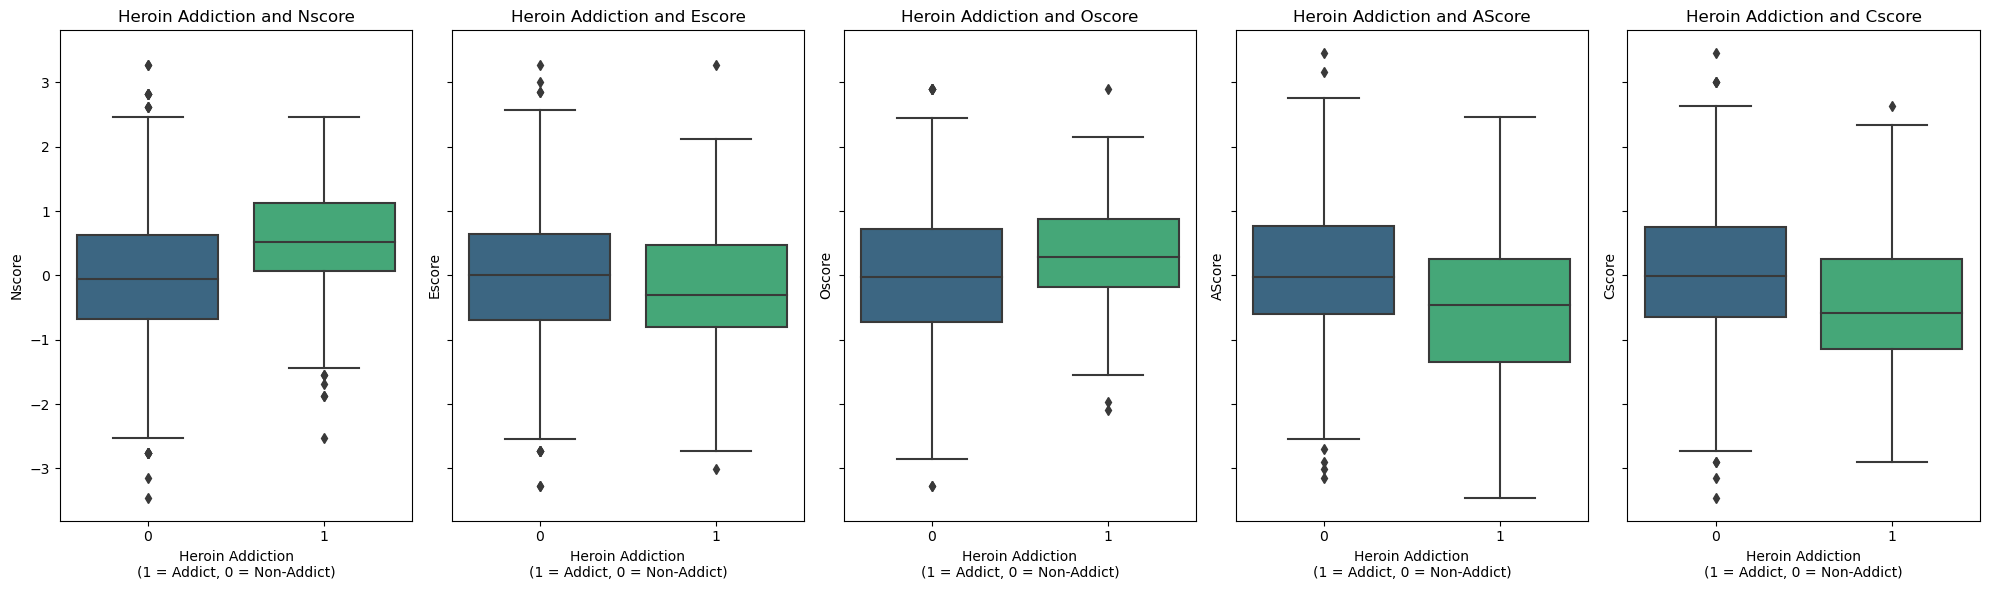

In [18]:
Heroin_df = mrkt_df.copy()
Heroin_df['Heroin_Addict'] = Heroin_df['Heroin'].apply(lambda x: 1 if x >= 3 else 0)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
sns.boxplot(ax=axes[0], data=Heroin_df, x='Heroin_Addict', y='Nscore', palette='viridis')
axes[0].set_title('Heroin Addiction and Nscore')
axes[0].set_xlabel('Heroin Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[1], data=Heroin_df, x='Heroin_Addict', y='Escore', palette='viridis')
axes[1].set_title('Heroin Addiction and Escore')
axes[1].set_xlabel('Heroin Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[2], data=Heroin_df, x='Heroin_Addict', y='Oscore', palette='viridis')
axes[2].set_title('Heroin Addiction and Oscore')
axes[2].set_xlabel('Heroin Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[3], data=Heroin_df, x='Heroin_Addict', y='AScore', palette='viridis')
axes[3].set_title('Heroin Addiction and AScore')
axes[3].set_xlabel('Heroin Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[4], data=Heroin_df, x='Heroin_Addict', y='Cscore', palette='viridis')
axes[4].set_title('Heroin Addiction and Cscore')
axes[4].set_xlabel('Heroin Addiction\n(1 = Addict, 0 = Non-Addict)')
plt.tight_layout()
plt.show()

In [19]:
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore']
for trait in personality_traits:
    addicts = Heroin_df[Heroin_df['Heroin_Addict'] == 1][trait]
    non_addicts = Heroin_df[Heroin_df['Heroin_Addict'] == 0][trait]
    t_stat, p_value = ttest_ind(addicts, non_addicts)
    print(f'{trait}: t-statistic = {t_stat}, p-value = {p_value}')

Nscore: t-statistic = 5.891977106153604, p-value = 4.51040804891348e-09
Escore: t-statistic = -2.526082162337375, p-value = 0.011615681245023908
Oscore: t-statistic = 3.902595218037964, p-value = 9.851637632057758e-05
AScore: t-statistic = -6.167555090805576, p-value = 8.467123021254009e-10
Cscore: t-statistic = -4.886080766881316, p-value = 1.1157302353671903e-06


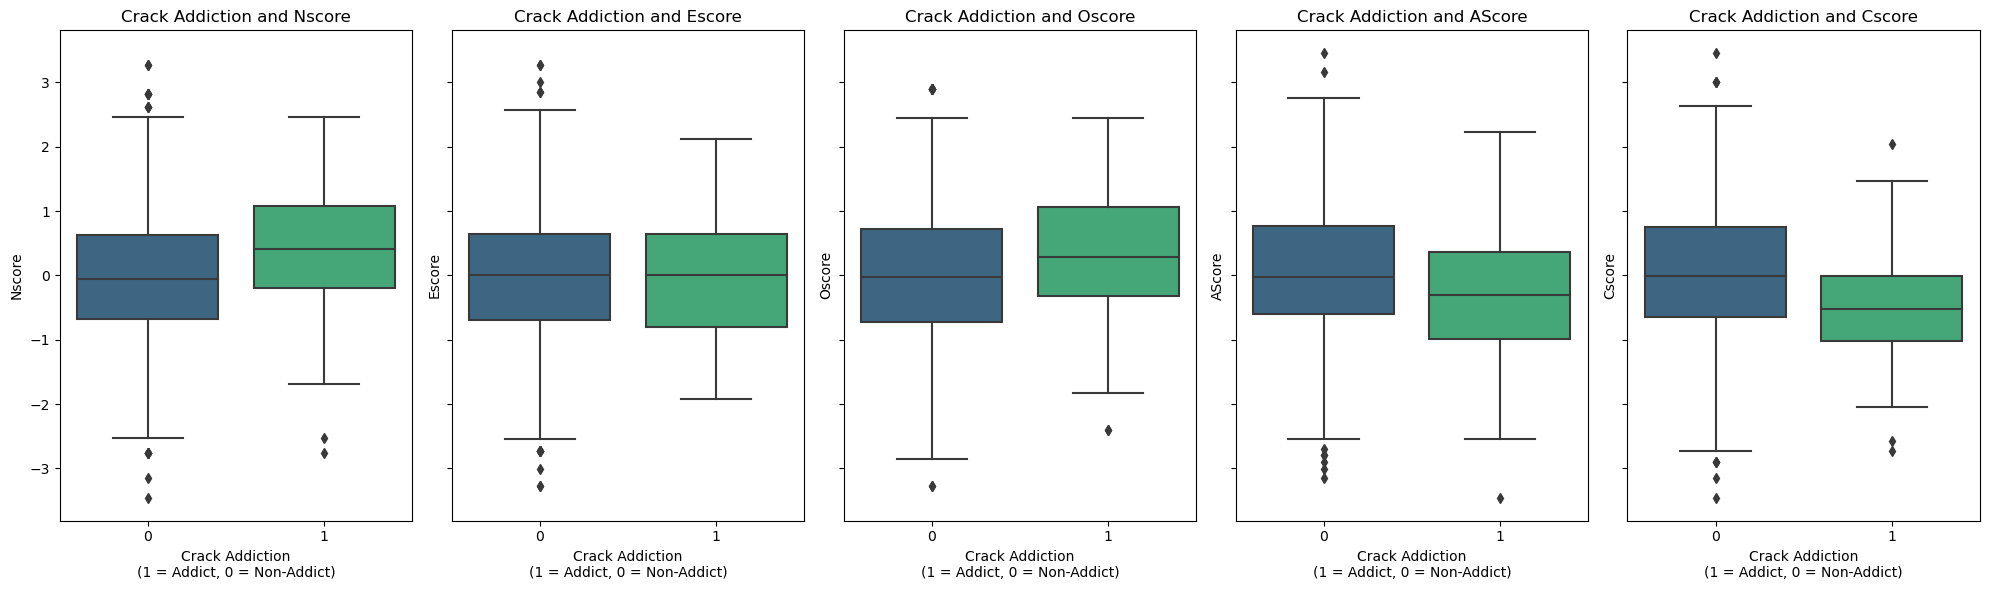

In [20]:
Crack_df = mrkt_df.copy()
Crack_df['Crack_Addict'] = Crack_df['Crack'].apply(lambda x: 1 if x >= 3 else 0)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
sns.boxplot(ax=axes[0], data=Crack_df, x='Crack_Addict', y='Nscore', palette='viridis')
axes[0].set_title('Crack Addiction and Nscore')
axes[0].set_xlabel('Crack Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[1], data=Crack_df, x='Crack_Addict', y='Escore', palette='viridis')
axes[1].set_title('Crack Addiction and Escore')
axes[1].set_xlabel('Crack Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[2], data=Crack_df, x='Crack_Addict', y='Oscore', palette='viridis')
axes[2].set_title('Crack Addiction and Oscore')
axes[2].set_xlabel('Crack Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[3], data=Crack_df, x='Crack_Addict', y='AScore', palette='viridis')
axes[3].set_title('Crack Addiction and AScore')
axes[3].set_xlabel('Crack Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[4], data=Crack_df, x='Crack_Addict', y='Cscore', palette='viridis')
axes[4].set_title('Crack Addiction and Cscore')
axes[4].set_xlabel('Crack Addiction\n(1 = Addict, 0 = Non-Addict)')
plt.tight_layout()
plt.show()

In [21]:
for trait in personality_traits:
    addicts = Crack_df[Crack_df['Crack_Addict'] == 1][trait]
    non_addicts = Crack_df[Crack_df['Crack_Addict'] == 0][trait]
    t_stat, p_value = ttest_ind(addicts, non_addicts)
    print(f'{trait}: t-statistic = {t_stat}, p-value = {p_value}')

Nscore: t-statistic = 3.50635525353371, p-value = 0.00046493674915351813
Escore: t-statistic = -0.7659866242913457, p-value = 0.4437803184679475
Oscore: t-statistic = 2.589620380950724, p-value = 0.009682279790006612
AScore: t-statistic = -2.9129236597131567, p-value = 0.003622830694297694
Cscore: t-statistic = -4.426649562880524, p-value = 1.0119428125376357e-05


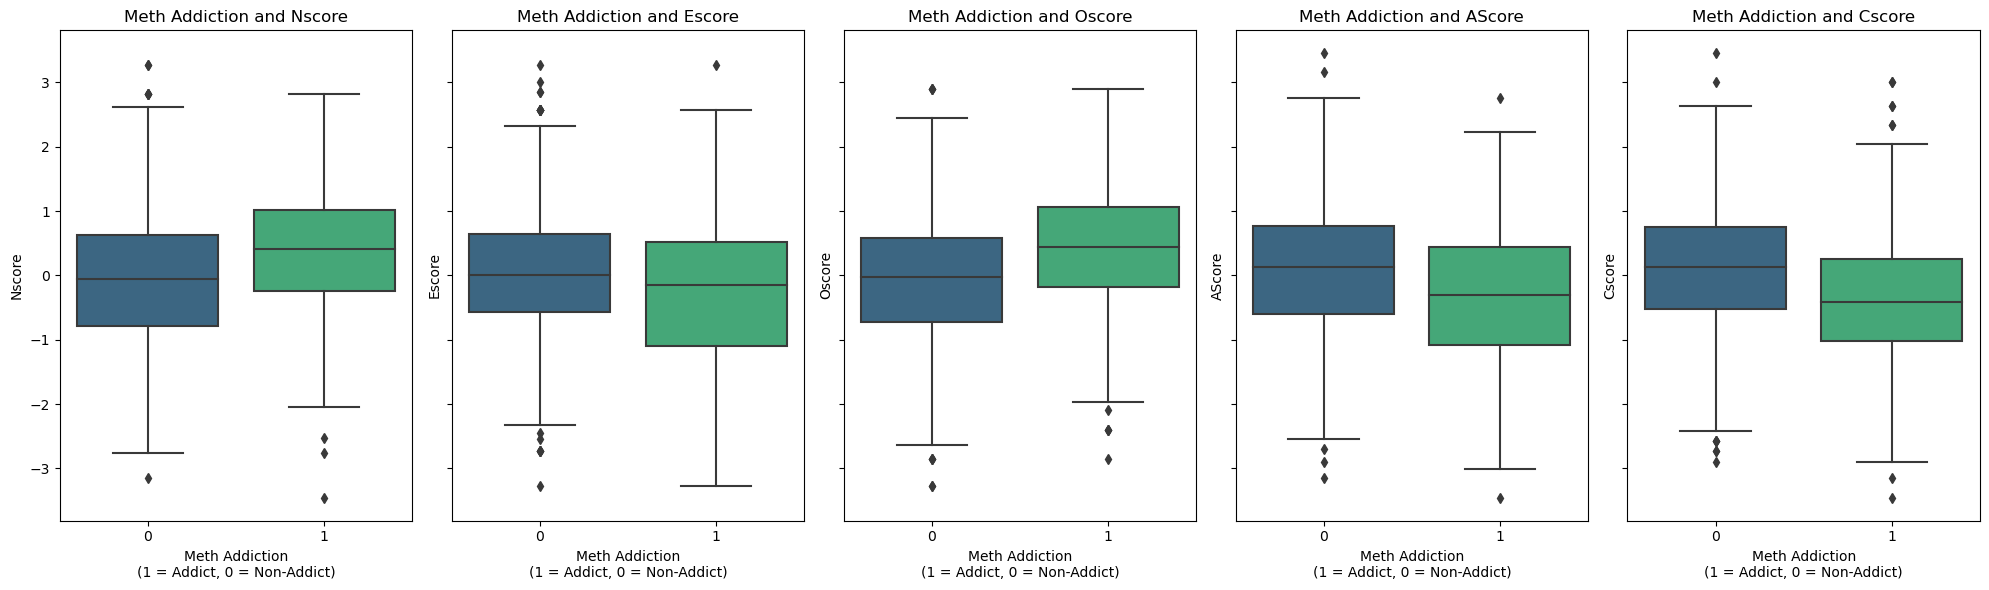

In [22]:
Meth_df = mrkt_df.copy()
Meth_df['Meth_Addict'] = Meth_df['Meth'].apply(lambda x: 1 if x >= 3 else 0)
fig, axes = plt.subplots(1, 5, figsize=(20, 6), sharey=True)
sns.boxplot(ax=axes[0], data=Meth_df, x='Meth_Addict', y='Nscore', palette='viridis')
axes[0].set_title('Meth Addiction and Nscore')
axes[0].set_xlabel('Meth Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[1], data=Meth_df, x='Meth_Addict', y='Escore', palette='viridis')
axes[1].set_title('Meth Addiction and Escore')
axes[1].set_xlabel('Meth Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[2], data=Meth_df, x='Meth_Addict', y='Oscore', palette='viridis')
axes[2].set_title('Meth Addiction and Oscore')
axes[2].set_xlabel('Meth Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[3], data=Meth_df, x='Meth_Addict', y='AScore', palette='viridis')
axes[3].set_title('Meth Addiction and AScore')
axes[3].set_xlabel('Meth Addiction\n(1 = Addict, 0 = Non-Addict)')
sns.boxplot(ax=axes[4], data=Meth_df, x='Meth_Addict', y='Cscore', palette='viridis')
axes[4].set_title('Meth Addiction and Cscore')
axes[4].set_xlabel('Meth Addiction\n(1 = Addict, 0 = Non-Addict)')
plt.tight_layout()
plt.show()

In [23]:
for trait in personality_traits:
    addicts = Meth_df[Meth_df['Meth_Addict'] == 1][trait]
    non_addicts = Meth_df[Meth_df['Meth_Addict'] == 0][trait]
    t_stat, p_value = ttest_ind(addicts, non_addicts)
    print(f'{trait}: t-statistic = {t_stat}, p-value = {p_value}')

Nscore: t-statistic = 7.2735821540677215, p-value = 5.112614146481401e-13
Escore: t-statistic = -4.160809731731145, p-value = 3.314058165350207e-05
Oscore: t-statistic = 7.766064218197393, p-value = 1.3199403356559353e-14
AScore: t-statistic = -6.735894791962483, p-value = 2.1577383127752384e-11
Cscore: t-statistic = -7.666982263064356, p-value = 2.8031772014097195e-14


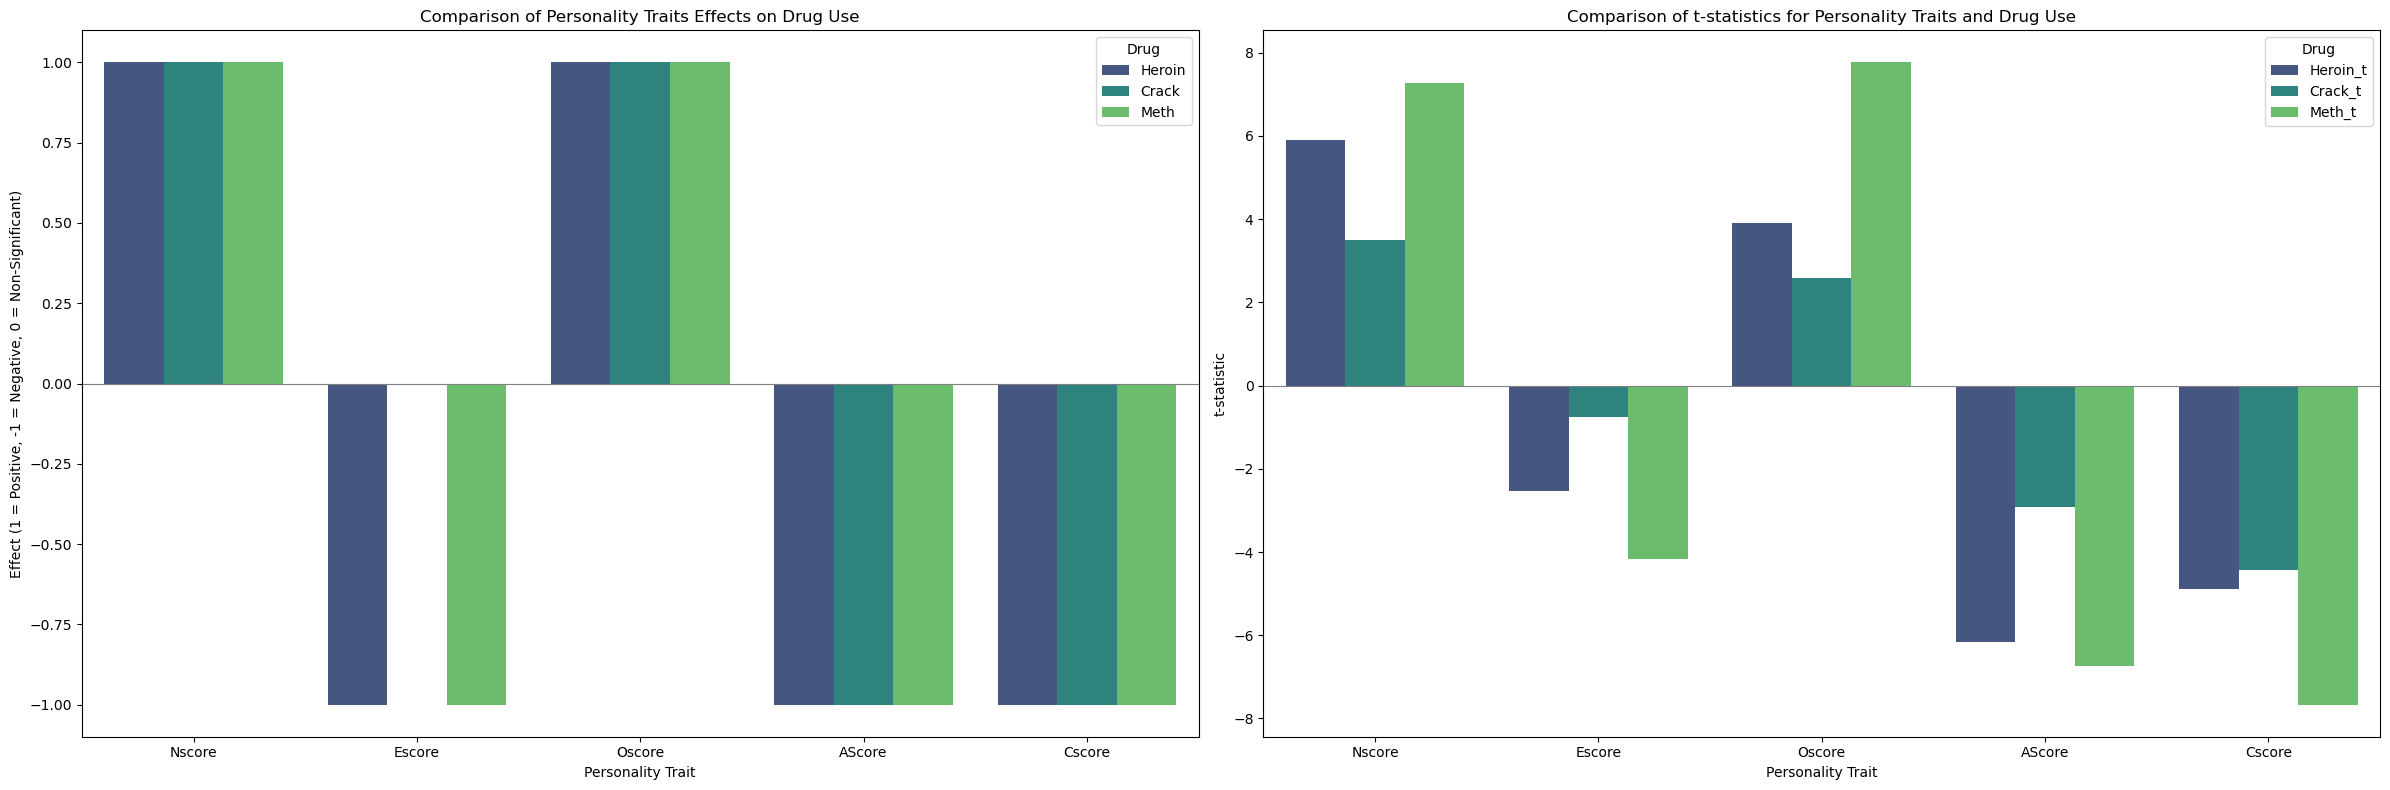

In [24]:
data_graph = {'Trait': ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore'], 'Heroin': [1, -1, 1, -1, -1], 'Crack': [1, 0, 1, -1, -1], 'Meth': [1, -1, 1, -1, -1]}
df_graph = pd.DataFrame(data_graph)
df_graph_melted = pd.melt(df_graph, id_vars='Trait', var_name='Drug', value_name='Effect')
fig, axes = plt.subplots(1, 2, figsize=(24, 8))
sns.barplot(data=df_graph_melted, x='Trait', y='Effect', hue='Drug', palette='viridis', ax=axes[0])
axes[0].axhline(0, color='gray', linewidth=0.8)
axes[0].set_title('Comparison of Personality Traits Effects on Drug Use')
axes[0].set_xlabel('Personality Trait')
axes[0].set_ylabel('Effect (1 = Positive, -1 = Negative, 0 = Non-Significant)')
axes[0].legend(title='Drug')
data_ttest = {'Trait': ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore'], 'Heroin_t': [5.891977106153604, -2.526082162337375, 3.902595218037964, -6.167555090805576, -4.886080766881316], 'Crack_t': [3.50635525353371, -0.7659866242913457, 2.589620380950724, -2.9129236597131567, -4.426649562880524], 'Meth_t': [7.2735821540677215, -4.160809731731145, 7.766064218197393, -6.735894791962483, -7.666982263064356]}
df_ttest = pd.DataFrame(data_ttest)
df_ttest_melted = pd.melt(df_ttest, id_vars='Trait', var_name='Drug', value_name='t-statistic')
sns.barplot(data=df_ttest_melted, x='Trait', y='t-statistic', hue='Drug', palette='viridis', ax=axes[1])
axes[1].axhline(0, color='gray', linewidth=0.8)
axes[1].set_title('Comparison of t-statistics for Personality Traits and Drug Use')
axes[1].set_xlabel('Personality Trait')
axes[1].set_ylabel('t-statistic')
axes[1].legend(title='Drug')
plt.tight_layout()
plt.show()

### Conclusion:
Neuroticism (Nscore): Positively associated with the use of all three drugs. The effect is strongest for meth use.

Extraversion (Escore): Negatively associated with heroin and meth use. Not significantly associated with crack use.

Openness to Experience (Oscore): Positively associated with the use of all three drugs. The effect is strongest for meth use.

Agreeableness (AScore): Negatively associated with the use of all three drugs. The effect is strongest for meth use.

Conscientiousness (Cscore): Negatively associated with the use of all three drugs. The effect is strongest for meth use.

These results indicate that individuals with higher neuroticism and openness to experience are more likely to use heroin, crack, and meth, while those with higher agreeableness and conscientiousness are less likely to use these drugs. Extraversion shows a negative association with heroin and meth use but is not significantly associated with crack use.

Now, based on the statistical test we performed, it will be easier to classify people who may become addicted. This way, it might be possible to focus addiction treatments on these hard drugs more effectively, and so on.

<a name="psychedelic-drugs"></a>
## psychedelic drugs
We want to examine a group of drugs that cause similar effects like psychedelic drugs and identify the typical users (i.e., those who have used in the last year, the last month, the last week, or the last day).

A brief explanation:

Impulsive: This trait measures a person's tendency to act on a whim, displaying behavior characterized by little or no forethought, reflection, or consideration of the consequences.

SS (Sensation Seeking): This trait measures a person's tendency to seek out thrilling and adventurous experiences, often involving a willingness to take risks in pursuit of such experiences.

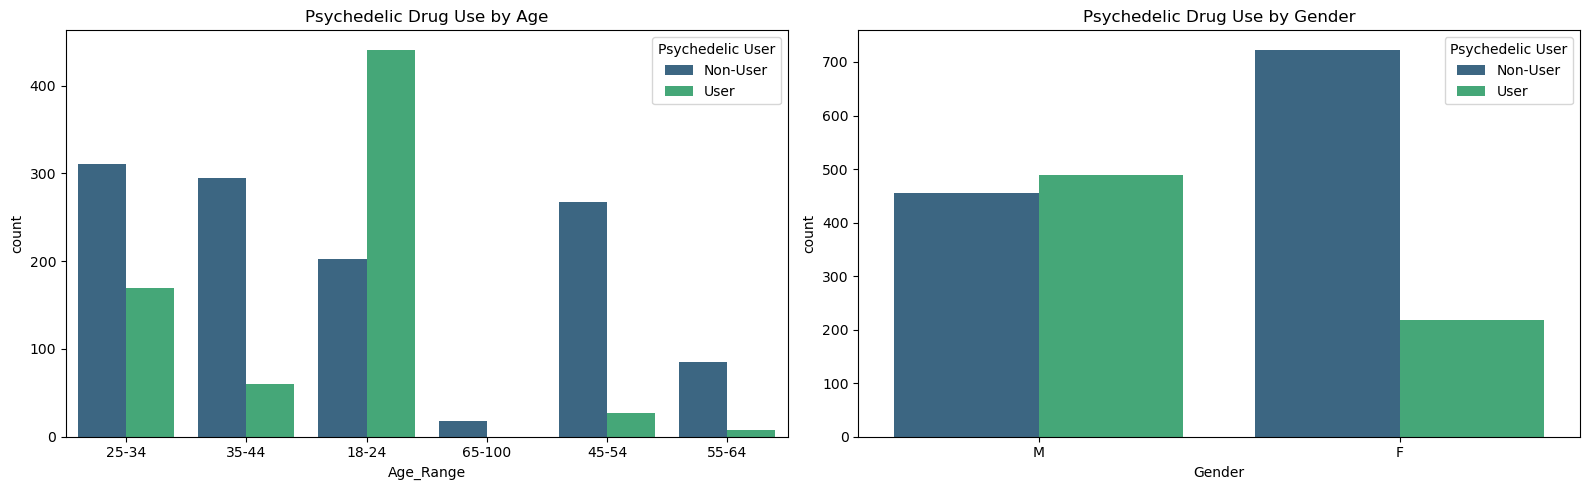

In [25]:
psychedelic_df = mrkt_df.copy()
psychedelic_drugs = ['LSD', 'Mushrooms', 'Ketamine', 'Ecstasy']
personality_traits = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
psychedelic_df['Psychedelic_User'] = psychedelic_df[psychedelic_drugs].max(axis=1).apply(lambda x: 1 if x >= 3 else 0)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.countplot(data=psychedelic_df, x='Age_Range', hue='Psychedelic_User', palette='viridis', ax=axes[0])
axes[0].set_title('Psychedelic Drug Use by Age')
axes[0].legend(title='Psychedelic User', labels=['Non-User', 'User'])
sns.countplot(data=psychedelic_df, x='Gender', hue='Psychedelic_User', palette='viridis', ax=axes[1])
axes[1].set_title('Psychedelic Drug Use by Gender')
axes[1].legend(title='Psychedelic User', labels=['Non-User', 'User'])
plt.tight_layout()
plt.show()

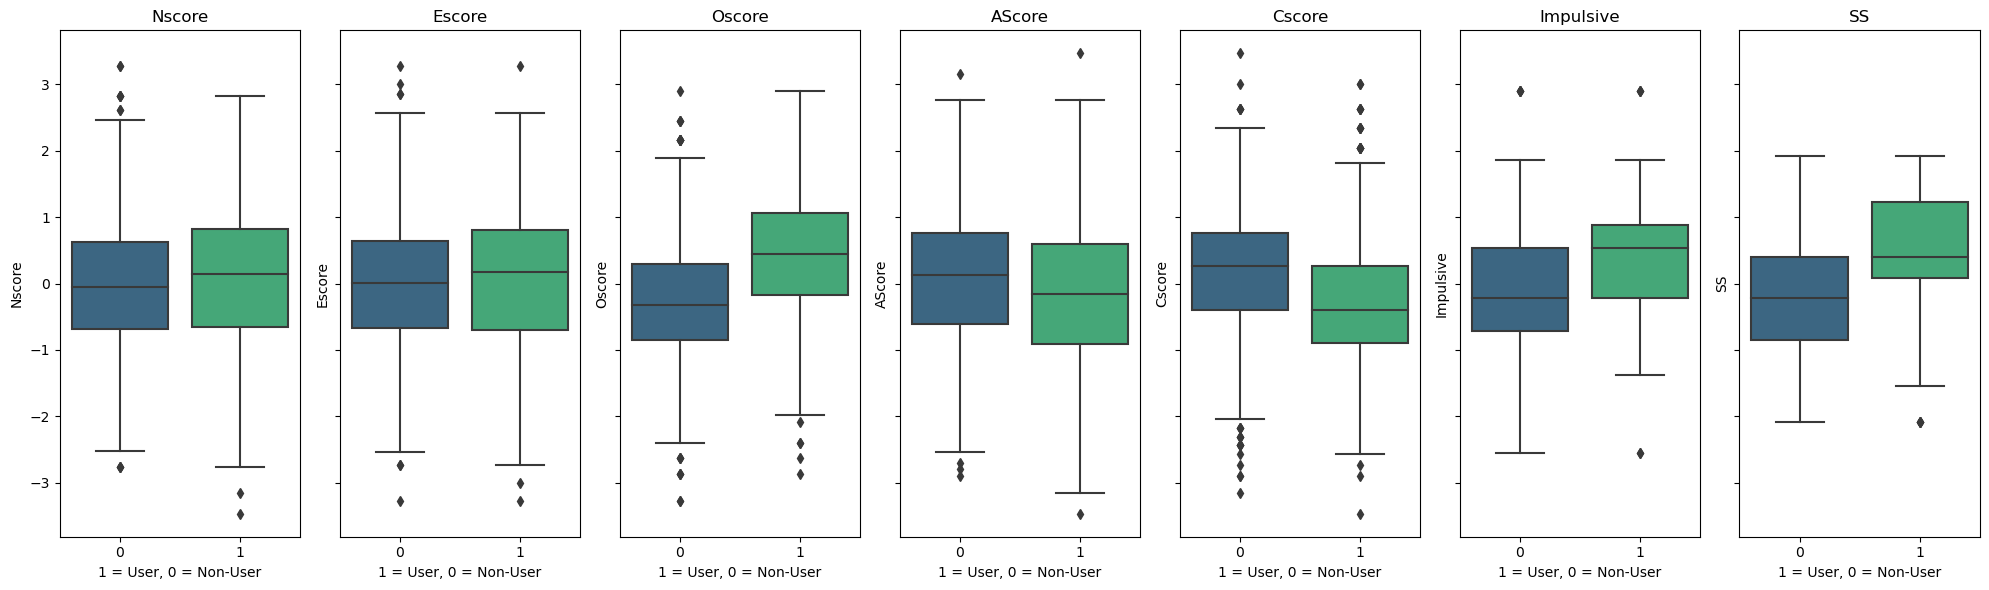

In [26]:
fig, axes = plt.subplots(1, len(personality_traits), figsize=(20, 6), sharey=True)
for i, trait in enumerate(personality_traits):
    sns.boxplot(data=psychedelic_df, x='Psychedelic_User', y=trait, palette='viridis', ax=axes[i])
    axes[i].set_title(f'{trait}')
    axes[i].set_xlabel('1 = User, 0 = Non-User')
plt.tight_layout()
plt.show()

In [27]:
X = psychedelic_df[personality_traits]
X = sm.add_constant(X)
y = psychedelic_df['Psychedelic_User']
logit_model = sm.Logit(y, X)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.527313
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       Psychedelic_User   No. Observations:                 1884
Model:                          Logit   Df Residuals:                     1876
Method:                           MLE   Df Model:                            7
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.2028
Time:                        21:28:01   Log-Likelihood:                -993.46
converged:                       True   LL-Null:                       -1246.1
Covariance Type:            nonrobust   LLR p-value:                5.690e-105
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6904      0.057    -12.058      0.000      -0.803      -0.578
Nscore        -0.1406      0.

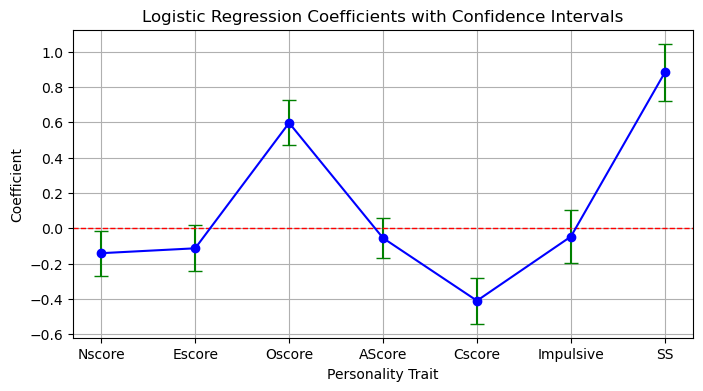

In [28]:
coefficients = result.params[1:]
conf_int = result.conf_int().loc[personality_traits]
plt.figure(figsize=(8, 4))
plt.errorbar(personality_traits, coefficients, yerr=[coefficients - conf_int[0], conf_int[1] - coefficients], fmt='o', color='blue', ecolor='green', capsize=5, linestyle='-')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Logistic Regression Coefficients with Confidence Intervals')
plt.xlabel('Personality Trait')
plt.ylabel('Coefficient')
plt.grid(True)
plt.show()

### Conclusion:
The graph and logistic regression clearly indicate that personality traits can be strong predictors of psychedelic drug use. Individuals with high scores in Oscore and SS are more likely to use psychedelic drugs, while those with high Cscore are less likely. Nscore also shows a negative but weaker association with psychedelic drug use. Traits like Escore, AScore, and Impulsive do not show significant relationships with psychedelic drug use.

Additionally, we can see that more than half of the men who answered the survey used psychedelic drugs within the time frame we examined. Moreover, we can see that this drug is primarily prevalent among young people under the age of 35, especially those aged 18-24. Therefore, we can classify the risk groups accordingly and, based on the results we found in the logistic regression, assess their risk level for using psychedelic drugs. This way, we can address the addiction problem more effectively.

<a name="cannabis"></a>
## Cannabis
Initially, we wanted to determine the three most common drugs (excluding chocolate, alcohol, nicotine, and caffeine) in each country.

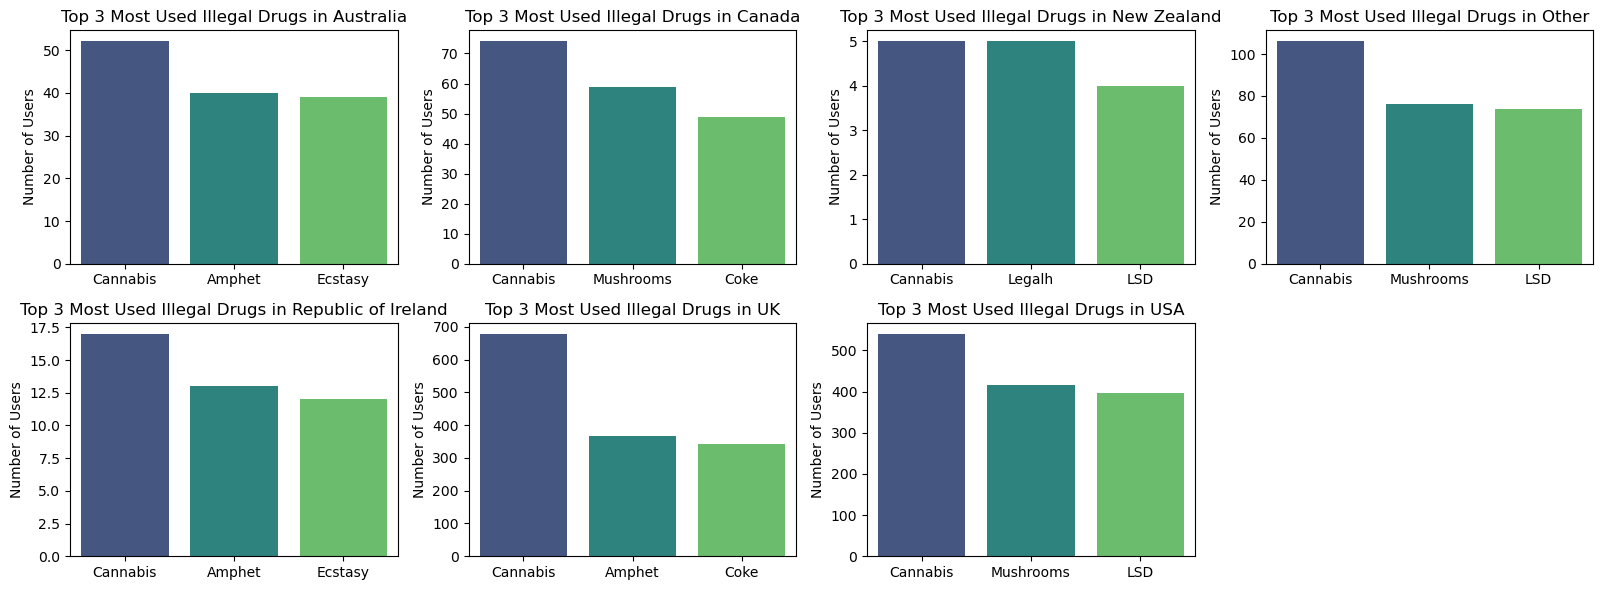

In [29]:
drug_cols = ['Amphet', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms']
ored = mrkt_df.copy()
melted_df = ored.melt(id_vars=['Country'], value_vars=drug_cols, var_name='Drug', value_name='Usage')
user_counts = melted_df[melted_df['Usage'] > 0].groupby(['Country', 'Drug']).size().reset_index(name='UserCount')
top_3_drugs_per_country = user_counts.groupby('Country').apply(lambda x: x.nlargest(3, 'UserCount')).reset_index(drop=True)
num_countries = top_3_drugs_per_country['Country'].nunique()
fig, axes = plt.subplots(2, 4, figsize=(16, 2 * 3), squeeze=False)
for (country, ax) in zip(top_3_drugs_per_country['Country'].unique(), axes.flatten()):
    country_df = top_3_drugs_per_country[top_3_drugs_per_country['Country'] == country]
    sns.barplot(x='Drug', y='UserCount', data=country_df, palette="viridis", ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('Number of Users')
    ax.set_title(f'Top 3 Most Used Illegal Drugs in {country}')
for ax in axes.flatten()[num_countries:]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

We can see that cannabis is the most commonly used drug in every country. Therefore, we wanted to examine the extent of its use and the correlation with each country's stance on legalization.

In [30]:
country_counts_all = ored['Country'].value_counts().reset_index()
country_counts_all.columns = ['Country', 'Count']
country_counts_all

,Country,Count
0,UK,1043
1,USA,557
2,Other,118
3,Canada,87
4,Australia,54
5,Republic of Ireland,20
6,New Zealand,5


We can see that only 5 people are from New Zealand and about 20 people are from Ireland. We prefer not to remove them from the dataset but to consider the results as less representative of these countries.

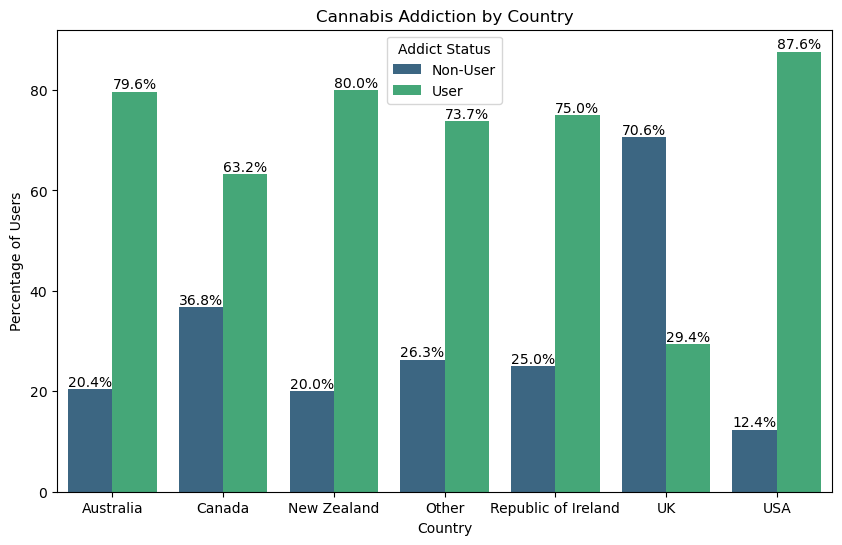

In [31]:
can_df = mrkt_df.copy()
can_df['Cannabis_Addict'] = can_df['Cannabis'].apply(lambda x: 1 if x >= 3 else 0)
usage_by_country = can_df.groupby(['Country', 'Cannabis_Addict']).size().unstack().fillna(0)
usage_by_country = usage_by_country.div(usage_by_country.sum(axis=1), axis=0) * 100
usage_df = usage_by_country.reset_index()
usage_df_melted = usage_df.melt(id_vars='Country', var_name='Addict_Status', value_name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=usage_df_melted, x='Country', y='Percentage', hue='Addict_Status', palette='viridis')
plt.title('Cannabis Addiction by Country')
plt.ylabel('Percentage of Users')
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Non-User' if label == '0' else 'User' for label in labels]
plt.legend(handles=handles, title='Addict Status', labels=labels)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.show()

### Conclusion:
Let's first note that most respondents to the survey are young people, which likely influences the appearance of the graph (and may not necessarily reflect the actual situation in these countries). We can see that in countries with legalization like Canada or the United States (where many states have legalized cannabis), the usage rates are particularly high. In Australia, New Zealand, and Ireland, although there is no legalization, the laws regarding cannabis consumption are relatively lenient. In the UK, we can see that most respondents did not use cannabis recently; the law there is stricter, though not overly so, which still results in relatively high percentages of cannabis users. It can be observed that the openness of the Western world towards cannabis influences the percentage of users, and there is a strong correlation between legalization and cannabis use.

![Example Image](https://github.com/yehonatansimcha/project2/blob/main/image1.png?raw=true)